<h1><center><font size="6"><b>Проектная работа</b></font></center></h1>
<h1><center><font size="6"><b>Аналитика в авиакомпании</b></font></center></h1>

<h1><center><font size="5"><b>Цель: анализ показателей рейсов внутри страны. </b></font></center></h1> 

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-общей-информации." data-toc-modified-id="Изучение-общей-информации.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение общей информации.</a></span><ul class="toc-item"><li><span><a href="#Изучение-исходной-информации." data-toc-modified-id="Изучение-исходной-информации.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение исходной информации.</a></span></li></ul></li><li><span><a href="#Проверка-типов-данных-на-корректность." data-toc-modified-id="Проверка-типов-данных-на-корректность.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Проверка типов данных на корректность.</a></span></li><li><span><a href="#Выбор-топ-10-городов-по-количеству-рейсов." data-toc-modified-id="Выбор-топ-10-городов-по-количеству-рейсов.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выбор топ-10 городов по количеству рейсов.</a></span></li><li><span><a href="#Построение-графиков-(модели-самолетов-и-количество-рейсов,-города-и-количество-рейсов,-топ-10-городов-и-количество-рейсов)." data-toc-modified-id="Построение-графиков-(модели-самолетов-и-количество-рейсов,-города-и-количество-рейсов,-топ-10-городов-и-количество-рейсов).-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Построение графиков (модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов).</a></span><ul class="toc-item"><li><span><a href="#Модели-самолетов-и-количество-рейсов." data-toc-modified-id="Модели-самолетов-и-количество-рейсов.-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Модели самолетов и количество рейсов.</a></span></li><li><span><a href="#Города-и-количество-рейсов." data-toc-modified-id="Города-и-количество-рейсов.-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Города и количество рейсов.</a></span></li><li><span><a href="#Топ-10-городов-и-количество-рейсов." data-toc-modified-id="Топ-10-городов-и-количество-рейсов.-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Топ-10 городов и количество рейсов.</a></span></li></ul></li><li><span><a href="#Выводы.-Оформление-выводов-по-каждому-из-графиков,-пояснение-результата." data-toc-modified-id="Выводы.-Оформление-выводов-по-каждому-из-графиков,-пояснение-результата.-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Выводы. Оформление выводов по каждому из графиков, пояснение результата.</a></span></li></ul></div>

##  Изучение общей информации. 

__Описание данных__  

Результат первого запроса. В нём содержится информация о:  
 - *model* — модели самолета
 - *flights_amount* — количество рейсов для каждой модели самолетов model в сентябре 2018 года
 
Результат третьего запроса. В нём содержится информация о: 
 - *city* — городах
 - *average_flights* — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года

### Изучение исходной информации.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st


import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
%config inlineBackend.figure_format='retina'
import seaborn as sns
#sns.set(color_codes=True)


import warnings
warnings.filterwarnings('ignore')

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

In [2]:
data_1 = pd.read_csv('/datasets/query_1.csv') 
data_2 = pd.read_csv('/datasets/query_3.csv') 

In [3]:
display(data_1)

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


Модели самолетов и количество перелетов. Ничего необычно. Пропусков нет.

In [4]:
data_2['average_flights'] = data_2['average_flights'].round(2) #округлим до двух знаков
display(data_2)

,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45
...,...,...
96,Чита,1.58
97,Элиста,4.87
98,Южно-Сахалинск,4.29
99,Якутск,2.74


Города и среднее количество рейсов. Ничего необычно. Пропусков нет.

## Проверка типов данных на корректность.

In [5]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [6]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Пропусков нет, типы данных корректные. Исходная информация в доработке не нуждается.

## Выбор топ-10 городов по количеству рейсов.

In [7]:
city_top_10 = data_2.pivot_table(index='city', values=['average_flights']).sort_values(by = 'average_flights',
                                                                                       ascending=False).head(10).reset_index()
city_top_10.columns = ['название города', 'ср. кол-во рейсов']
city_top_10.style.background_gradient(cmap='Set3')

,название города,ср. кол-во рейсов
0,Москва,129.77
1,Санкт-Петербург,31.16
2,Новосибирск,17.32
3,Красноярск,11.58
4,Екатеринбург,11.32
5,Ростов-на-Дону,10.19
6,Пермь,10.13
7,Брянск,10
8,Сочи,9.61
9,Ульяновск,9.58


Абсолютный лидер - Москва. Значительно уступают Санкт-Петербург и Новосибирск. Остальные 7 городов  примерно в одном диапазоне.

## Построение графиков (модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов).

### Модели самолетов и количество рейсов.

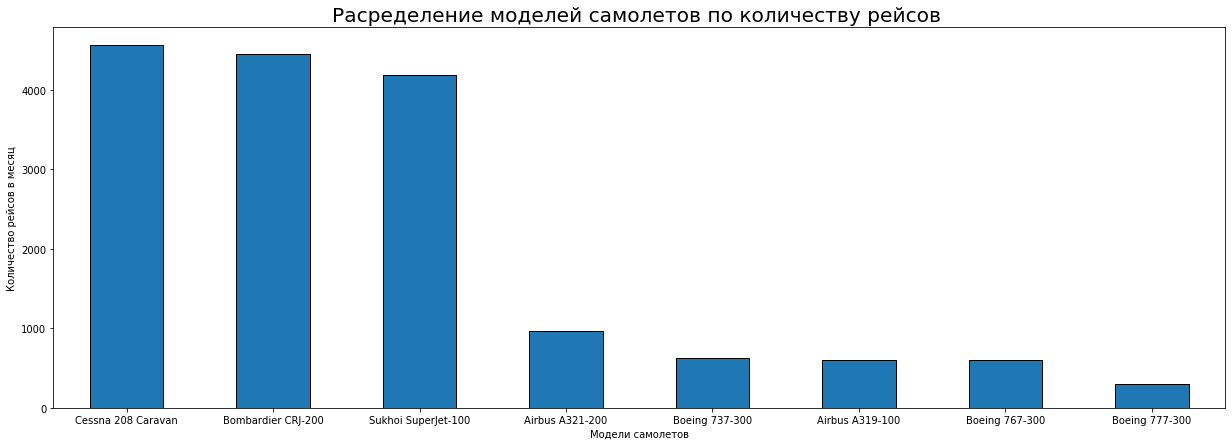

In [8]:
model = data_1.groupby('model')['flights_amount'].sum().sort_values(ascending=False).head(10)
model.plot(kind='bar', figsize=(21, 7), grid=False, ec='black', rot=0)

plt.style.use('fivethirtyeight')
plt.xlabel('Модели самолетов')
plt.ylabel('Количество рейсов в месяц')
plt.title('Расределение моделей самолетов по количеству рейсов ')
plt.show()

Самыми популярными являются Cessna, Bombardier и Suknoi. Boing и Airbas значительно остают.  

 - Cessna 208 Caravan - малый самолет, количество мест до 14. 
 - Bombardier CRJ200 - самолет на 40-50 мест. 
 - Sukhoi SuperJet-100 - количество мест от 87 до 108.  

Boing и Airbas представлены самолетами с большой вместимостью.  
  
Очевидно самыми полпулярными являются малые самолеты для перелетов на короткие расстояния.

### Города и количество рейсов.

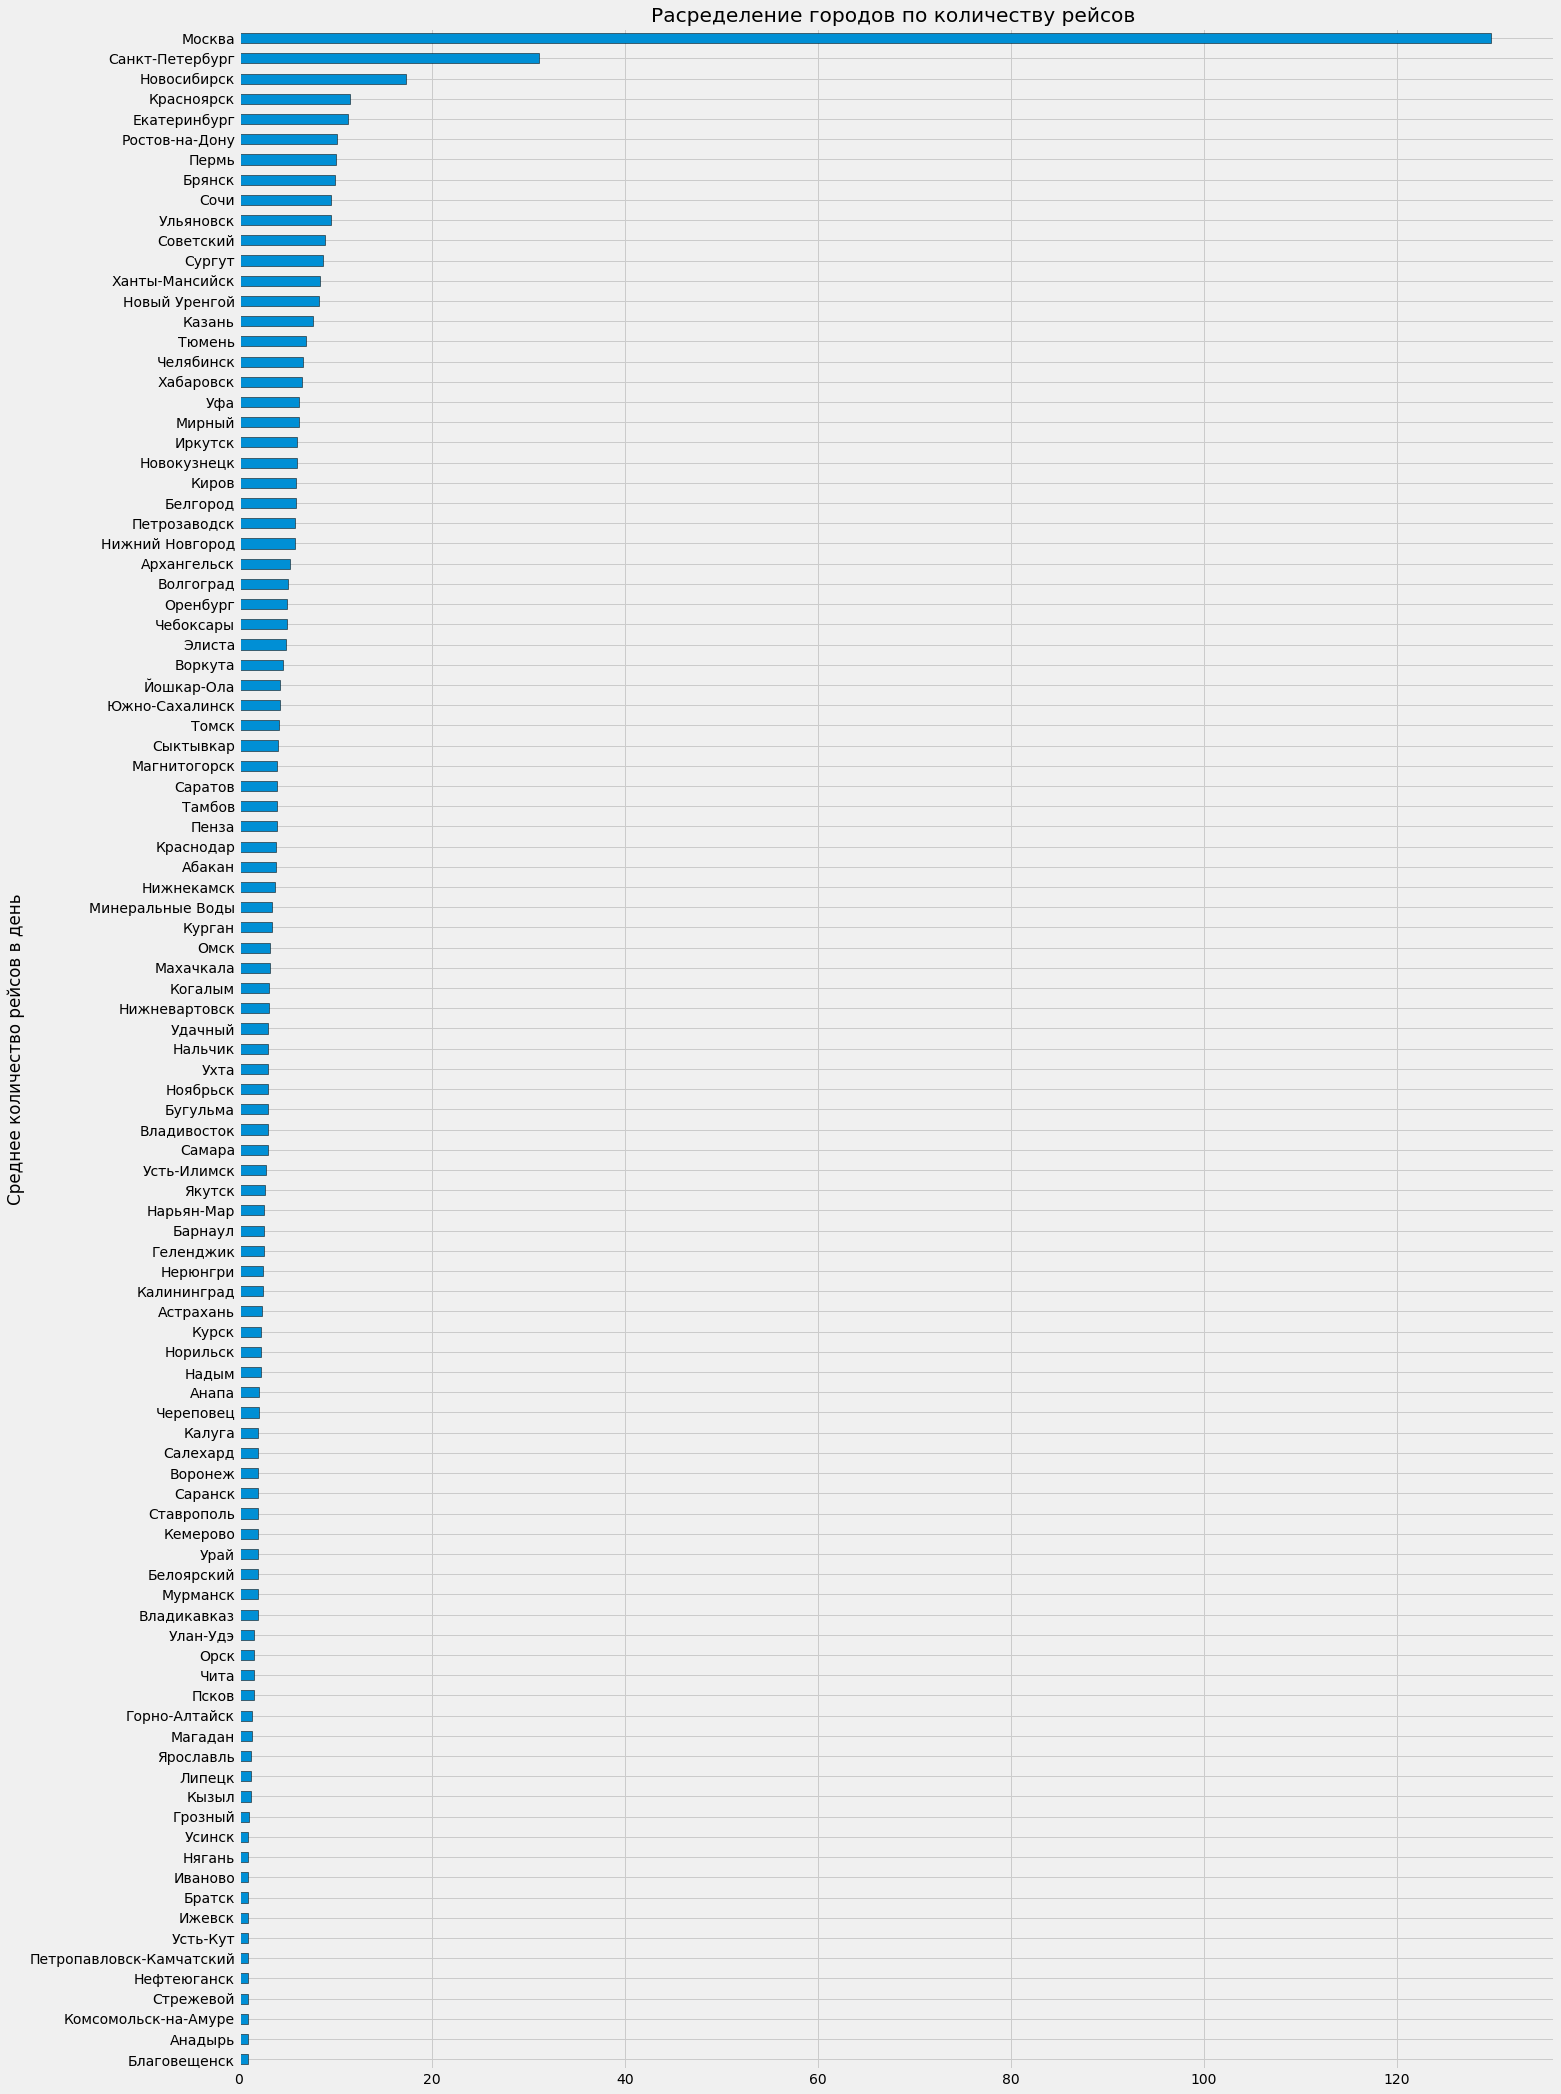

In [9]:
all_city = data_2.groupby('city')['average_flights'].sum().sort_values(ascending=True)
all_city.plot(kind='barh', figsize=(21, 35), grid=True, ec='black', rot=0)

plt.style.use('fivethirtyeight')
plt.xlabel('')
plt.ylabel('Среднее количество рейсов в день')
plt.title('Расределение городов по количеству рейсов ')

plt.show()

Почти все рейсы сосредоточены на Москве, Санкт-Петербурге и Новосибирске, далее идут по убыванию.

### Топ-10 городов и количество рейсов.

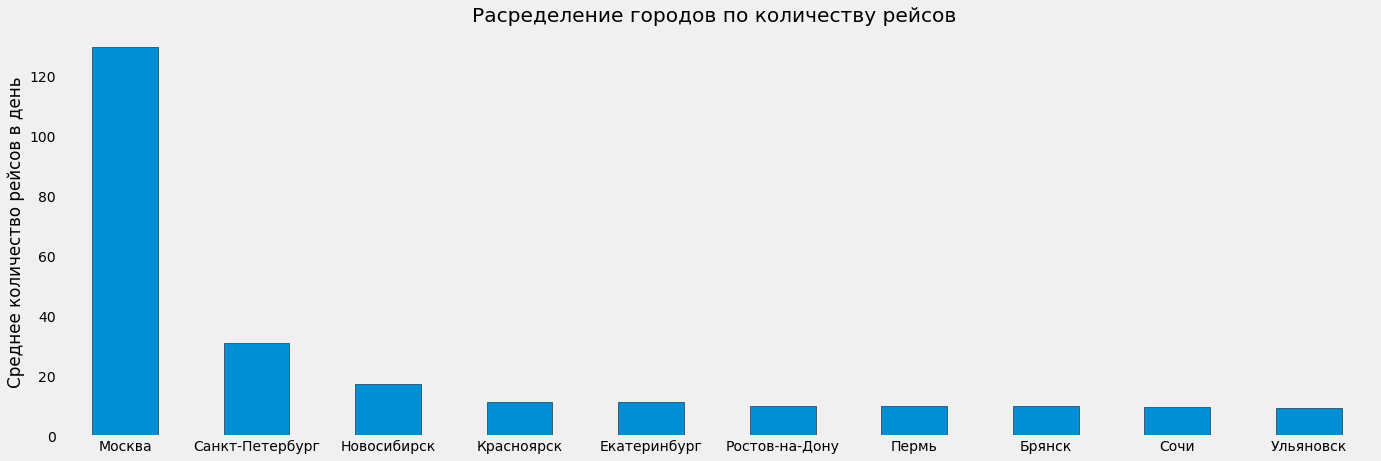

In [10]:
top_10_city = data_2.groupby('city')['average_flights'].sum().sort_values(ascending=False).head(10)
top_10_city.plot(kind='bar', figsize=(21, 7), grid=False, ec='black', rot=0)

plt.style.use('fivethirtyeight')
plt.xlabel('')
plt.ylabel('Среднее количество рейсов в день')
plt.title('Расределение городов по количеству рейсов ')

plt.show()

Москва значительно обгоняет все остальные города по среднему количеству рейсов.

## Выводы. Оформление выводов по каждому из графиков, пояснение результата.

По результатам исследования выявлено:  
Больше всего полетов совершают малые самолеты: Cessna 208 Caravan, Bombardier CRJ200, Sukhoi SuperJet-100. 
Самолеты Boing и Airbas представлены моделями с большой вместимостью.  
Самым большим по среднему количеству рейсов городом является Москва. Значительно уступают Санкт-Петербург и Новосибирск. Подавляющее большинство рейсов сосредоточено на этих городах.